## Scraping NFL Fantasy Pages

In [ ]:
# Importing the required libraries
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
# Creating lists for each variable of interest
# Scrapped data will be appended to these lists
player_list = []
team_list = []
fantasy_pos_list = []
age_list = []
g_list = []
gs_list = []
pass_cmp_list = []
pass_att_list = []
pass_yds_list = []
pass_td_list = []
pass_int_list = []
rush_att_list = []
rush_yds_list = []
rush_yds_per_att_list = []
rush_td_list = []
targets_list = []
rec_list = []
rec_yds_list = []
rec_yds_per_rec_list = []
rec_td_list = []
all_td_list = []
two_pt_md_list = []
two_pt_pass_list = []
url_list =[]

In [ ]:
# Iterating through the range of years from 2018 to 2022 (inclusive)
for year in range(2018, 2023):
  # The URL for each year's fantasy football stats page is constructed using string formatting to insert the year into the URL string
    url = f"https://www.pro-football-reference.com/years/{year}/fantasy.htm"
    # Making HTTP GET request to the URL
    response = requests.get(url)
    # Storing HTML content of the HTTP response object to variable html_content
    html_content = response.text
    # Parsing HTML content as a BeautifulSoup object
    soup = BeautifulSoup(html_content, 'html.parser')


    '''
    Searching BeautifulSoup object for all td elements with the data-stat attribute set to 'player',
    'team', 'fantasy_pos', 'age', 'g', 'gs', 'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
    'rush_att', 'rush_yds', 'rush_yds_per_att', 'rush_td', 'targets', 'rec', 'rec_yds', 'rec_yds_per_rec',
    'rec_td', 'all_td', 'two_pt_md', and 'two_pt_pass' and extracting the text content using text attribute
    '''

    players = [player.text.strip('*+') for player in soup.find_all('td', attrs={'data-stat': 'player'})]
    teams = [team.text for team in soup.find_all('td', attrs={'data-stat': 'team'})]
    fantasy_positions = [pos.text for pos in soup.find_all('td', attrs={'data-stat': 'fantasy_pos'})]
    ages = [age.text for age in soup.find_all('td', attrs={'data-stat': 'age'})]
    g = [g.text for g in soup.find_all('td', attrs={'data-stat': 'g'})]
    gs = [gs.text for gs in soup.find_all('td', attrs={'data-stat': 'gs'})]
    pass_cmp = [pass_cmp.text for pass_cmp in soup.find_all('td', attrs={'data-stat': 'pass_cmp'})]
    pass_att = [pass_att.text for pass_att in soup.find_all('td', attrs={'data-stat': 'pass_att'})]
    pass_yds = [pass_yds.text for pass_yds in soup.find_all('td', attrs={'data-stat': 'pass_yds'})]
    pass_td = [pass_td.text for pass_td in soup.find_all('td', attrs={'data-stat': 'pass_td'})]
    pass_int = [pass_int.text for pass_int in soup.find_all('td', attrs={'data-stat': 'pass_int'})]
    rush_att = [rush_att.text for rush_att in soup.find_all('td', attrs={'data-stat': 'rush_att'})]
    rush_yds = [rush_yds.text for rush_yds in soup.find_all('td', attrs={'data-stat': 'rush_yds'})]
    rush_yds_per_att = [rush_yds_per_att.text for rush_yds_per_att in soup.find_all('td', attrs={'data-stat': 'rush_yds_per_att'})]
    rush_td = [rush_td.text for rush_td in soup.find_all('td', attrs={'data-stat': 'rush_td'})]
    targets = [targets.text for targets in soup.find_all('td', attrs={'data-stat': 'targets'})]
    rec = [rec.text for rec in soup.find_all('td', attrs={'data-stat': 'rec'})]
    rec_yds = [rec_yds.text for rec_yds in soup.find_all('td', attrs={'data-stat': 'rec_yds'})]
    rec_yds_per_rec = [rec_yds_per_rec.text for rec_yds_per_rec in soup.find_all('td', attrs={'data-stat': 'rec_yds_per_rec'})]
    rec_td = [rec_td.text for rec_td in soup.find_all('td', attrs={'data-stat': 'rec_td'})]
    all_td = [all_td.text for all_td in soup.find_all('td', attrs={'data-stat': 'all_td'})]
    two_pt_md = [two_pt_md.text for two_pt_md in soup.find_all('td', attrs={'data-stat': 'two_pt_md'})]
    two_pt_pass = [two_pt_pass.text for two_pt_pass in soup.find_all('td', attrs={'data-stat': 'two_pt_pass'})]
    urls = [url] * len(players)

    # Extending each variavle list with the extracted data list for that variable
    player_list += players #| player_list = player_list + players
    team_list += teams
    fantasy_pos_list += fantasy_positions
    age_list += ages
    g_list += g
    gs_list += gs
    pass_cmp_list += pass_cmp
    pass_att_list += pass_att
    pass_yds_list += pass_yds
    pass_td_list += pass_td
    pass_int_list += pass_int
    rush_att_list += rush_att
    rush_yds_list += rush_yds
    rush_yds_per_att_list += rush_yds_per_att
    rush_td_list += rush_td
    targets_list += targets
    rec_list += rec
    rec_yds_list += rec_yds
    rec_yds_per_rec_list += rec_yds_per_rec
    rec_td_list += rec_td
    all_td_list += all_td
    two_pt_md_list += two_pt_md
    two_pt_pass_list += two_pt_pass
    # Extending the URL list with the URL for that year's page, repeated for each player in the list
    url_list += urls


In [ ]:
len(url_list)

3214

In [ ]:
nfl = pd.DataFrame({
    'player': player_list,
    'team': team_list,
    'fantasy_pos': fantasy_pos_list,
    'age': age_list,
    'g': g_list,
    'gs': gs_list,
    'pass_cmp': pass_cmp_list,
    'pass_att': pass_att_list,
    'pass_yds': pass_yds_list,
    'pass_td': pass_td_list,
    'pass_int': pass_int_list,
    'rush_att': rush_att_list,
    'rush_yds': rush_yds_list,
    'rush_yds_per_att': rush_yds_per_att_list,
    'rush_td': rush_td_list,
    'targets': targets_list,
    'rec': rec_list,
    'rec_yds': rec_yds_list,
    'rec_yds_per_rec': rec_yds_per_rec_list,
    'rec_td': rec_td_list,
    'all_td': all_td_list,
    'two_pt_md': two_pt_md_list,
    'two_pt_pass': two_pt_pass_list,
    'url': url_list
})


In [ ]:
nfl.shape

(3214, 24)

In [ ]:
nfl.head()

,player,team,fantasy_pos,age,g,gs,pass_cmp,pass_att,pass_yds,pass_td,...,rush_td,targets,rec,rec_yds,rec_yds_per_rec,rec_td,all_td,two_pt_md,two_pt_pass,url
0,Todd Gurley,LAR,RB,24,14,14,0,0,0,0,...,17,81,59,580,9.83,4,21,3,,https://www.pro-football-reference.com/years/2...
1,Saquon Barkley,NYG,RB,21,16,16,0,0,0,0,...,11,121,91,721,7.92,4,15,1,,https://www.pro-football-reference.com/years/2...
2,Christian McCaffrey,CAR,RB,22,16,16,1,1,50,1,...,7,124,107,867,8.10,6,13,,,https://www.pro-football-reference.com/years/2...
3,Alvin Kamara,NOR,RB,23,15,13,0,0,0,0,...,14,105,81,709,8.75,4,18,3,,https://www.pro-football-reference.com/years/2...
4,Patrick Mahomes,KAN,QB,23,16,16,383,580,5097,50,...,2,0,0,0,,0,2,1,,https://www.pro-football-reference.com/years/2...


In [ ]:
nfl['Year'] = nfl['url'].str.extract(r'(\d{4})')
nfl.columns

Index(['player', 'team', 'fantasy_pos', 'age', 'g', 'gs', 'pass_cmp',
       'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'targets', 'rec', 'rec_yds',
       'rec_yds_per_rec', 'rec_td', 'all_td', 'two_pt_md', 'two_pt_pass',
       'url', 'Year'],
      dtype='object')

In [ ]:
nfl = nfl.drop(columns=['url'])

In [ ]:
nfl.shape

(3214, 24)

In [ ]:
Arizona_Cardinals = ['ARZ','ARI']
Atlanta_Falcons = ['ATL','ATL']
Baltimore_Ravens = ['BLT','BAL']
Buffalo_Bills = ['BUF','BUF']
Carolina_Panthers = ['CAR','CAR']
Chicago_Bears = ['CHI','CHI']
Cincinnati_Bengals = ['CIN','CIN']
Cleveland_Browns = ['CLV','CLE']
Dallas_Cowboys = ['DAL','DAL']
Denver_Broncos = ['DEN','DEN']
Detroit_Lions = ['DET','DET']
Green_Bay_Packers = ['GB','GNB']
Houston_Texans = ['HST','HOU']
Indianapolis_Colts = ['IND','IND']
Jacksonville_Jaguars = ['JAX','JAC']
Kansas_City_Chiefs = ['KC','KAN']
Las_Vegas_Raiders = ['LV','OAK']
Los_Angeles_Chargers = ['LAC','LAC']
Los_Angeles_Rams = ['LA','LVR','LAR']
Miami_Dolphins = ['MIA','MIA']
Minnesota_Vikings = ['MIN','MIN']
New_England_Patriots = ['NE','NWE']
New_Orleans_Saints = ['NO','NOR']
New_York_Giants = ['NYG','NYG']
New_York_Jets = ['NYJ','NYJ']
Philadelphia_Eagles = ['PHI','PHI']
Pittsburgh_Steelers = ['PIT','PIT']
San_Francisco_49ers = ['SF','SFO']
Seattle_Seahawks = ['SEA','SEA']
Tampa_Bay_Buccaneers = ['TB','TAM']
Tennessee_Titans = ['TEN','TEN']
Washington_Commanders = ['WAS','WAS']
Multi_Team = ['2TM','3TM']

In [ ]:
division_dict = {}
for team in Arizona_Cardinals:
  division_dict[team] = 'Arizona Cardinals'
for team in Atlanta_Falcons:
  division_dict[team] = 'Atlanta Falcons'
for team in Baltimore_Ravens:
  division_dict[team] = 'Baltimore Ravens'
for team in Buffalo_Bills:
  division_dict[team] = 'Buffalo Bills'
for team in Carolina_Panthers:
  division_dict[team] = 'Carolina Panthers'
for team in Chicago_Bears:
  division_dict[team] = 'Chicago Bears'
for team in Cincinnati_Bengals:
  division_dict[team] = 'Cincinnati Bengals'
for team in Cleveland_Browns:
  division_dict[team] = 'Cleveland Browns'
for team in Dallas_Cowboys:
  division_dict[team] = 'Dallas Cowboys'
for team in Denver_Broncos:
  division_dict[team] = 'Denver Broncos'
for team in Detroit_Lions:
  division_dict[team] = 'Detroit Lions'
for team in Green_Bay_Packers:
  division_dict[team] = 'Green Bay Packers'
for team in Houston_Texans:
  division_dict[team] = 'Houston Texans'
for team in Indianapolis_Colts:
  division_dict[team] = 'Indianapolis Colts'
for team in Jacksonville_Jaguars:
  division_dict[team] = 'Jacksonville Jaguars'
for team in Kansas_City_Chiefs:
  division_dict[team] = 'Kansas City Chiefs'
for team in Las_Vegas_Raiders:
  division_dict[team] = 'Las Vegas Raiders'
for team in Los_Angeles_Chargers:
  division_dict[team] = 'Los Angeles Chargers'
for team in Los_Angeles_Rams:
  division_dict[team] = 'Los Angeles Rams'
for team in Miami_Dolphins:
  division_dict[team] = 'Miami Dolphins'
for team in Minnesota_Vikings:
  division_dict[team] = 'Minnesota Vikings'
for team in New_England_Patriots:
  division_dict[team] = 'New England Patriots'
for team in New_Orleans_Saints:
  division_dict[team] = 'New Orleans Saints'
for team in New_York_Giants:
  division_dict[team] = 'New York Giants'
for team in New_York_Jets:
  division_dict[team] = 'New York Jets'
for team in Philadelphia_Eagles:
  division_dict[team] = 'Philadelphia Eagles'
for team in Pittsburgh_Steelers:
  division_dict[team] = 'Pittsburgh Steelers'
for team in San_Francisco_49ers:
  division_dict[team] = 'San Francisco 49ers'
for team in Seattle_Seahawks:
  division_dict[team] = 'Seattle Seahawks'
for team in Tampa_Bay_Buccaneers:
  division_dict[team] = 'Tampa Bay Buccaneers'
for team in Tennessee_Titans:
  division_dict[team] = 'Tennessee Titans'
for team in Washington_Commanders:
  division_dict[team] = 'Washington Commanders'
for team in Multi_Team:
  division_dict[team] = 'Multiple Teams'


nfl['team'] = nfl['team'].map(division_dict)

In [ ]:
nfl

,player,team,fantasy_pos,age,g,gs,pass_cmp,pass_att,pass_yds,pass_td,...,rush_td,targets,rec,rec_yds,rec_yds_per_rec,rec_td,all_td,two_pt_md,two_pt_pass,Year
0,Todd Gurley,Los Angeles Rams,RB,24,14,14,0,0,0,0,...,17,81,59,580,9.83,4,21,3,,2018
1,Saquon Barkley,New York Giants,RB,21,16,16,0,0,0,0,...,11,121,91,721,7.92,4,15,1,,2018
2,Christian McCaffrey,Carolina Panthers,RB,22,16,16,1,1,50,1,...,7,124,107,867,8.10,6,13,,,2018
3,Alvin Kamara,New Orleans Saints,RB,23,15,13,0,0,0,0,...,14,105,81,709,8.75,4,18,3,,2018
4,Patrick Mahomes,Kansas City Chiefs,QB,23,16,16,383,580,5097,50,...,2,0,0,0,,0,2,1,,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,Ihmir Smith-Marsette,Multiple Teams,WR,23,8,0,0,0,0,0,...,0,4,1,15,15.00,0,0,,,2022
3210,KaVontae Turpin,Dallas Cowboys,WR,26,17,0,0,0,0,0,...,0,2,1,9,9.00,0,0,,,2022
3211,Taiwan Jones,Buffalo Bills,,34,16,0,0,0,0,0,...,0,0,0,0,,0,0,,,2022
3212,Chester Rogers,Cleveland Browns,,28,3,0,0,0,0,0,...,0,0,0,0,,0,0,,,2022


# Data Exploration

In [ ]:
for column in nfl.columns:
  print(column + " " +str(nfl[column].isna().sum()))

player 0
team 0
fantasy_pos 0
age 0
g 0
gs 0
pass_cmp 0
pass_att 0
pass_yds 0
pass_td 0
pass_int 0
rush_att 0
rush_yds 0
rush_yds_per_att 0
rush_td 0
targets 0
rec 0
rec_yds 0
rec_yds_per_rec 0
rec_td 0
all_td 0
two_pt_md 0
two_pt_pass 0
Year 0


In [ ]:
nfl.dtypes

player              object
team                object
fantasy_pos         object
age                 object
g                   object
gs                  object
pass_cmp            object
pass_att            object
pass_yds            object
pass_td             object
pass_int            object
rush_att            object
rush_yds            object
rush_yds_per_att    object
rush_td             object
targets             object
rec                 object
rec_yds             object
rec_yds_per_rec     object
rec_td              object
all_td              object
two_pt_md           object
two_pt_pass         object
Year                object
dtype: object

In [ ]:
nfl.describe()

,player,team,fantasy_pos,age,g,gs,pass_cmp,pass_att,pass_yds,pass_td,...,rush_td,targets,rec,rec_yds,rec_yds_per_rec,rec_td,all_td,two_pt_md,two_pt_pass,Year
count,3214,3214,3214,3214,3214,3214,3214,3214,3214,3214,...,3214,3214,3214,3214,3214,3214,3214,3214,3214,3214
unique,1192,33,5,25,18,18,221,249,354,45,...,20,169,119,790,939,19,22,4,6,5
top,Ryan Griffin,Los Angeles Rams,WR,24,16,0,0,0,0,0,...,0,0,0,0,,0,0,,,2021
freq,6,144,1093,485,635,1037,2769,2716,2769,2889,...,2506,692,782,785,783,1858,1428,2937,3078,670


In [ ]:
nfl[['age', 'g', 'gs', 'pass_cmp',
       'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'targets', 'rec', 'rec_yds',
       'rec_yds_per_rec', 'rec_td', 'all_td', 'two_pt_md', 'two_pt_pass']] = nfl[['age', 'g', 'gs', 'pass_cmp',
       'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'targets', 'rec', 'rec_yds',
       'rec_yds_per_rec', 'rec_td', 'all_td', 'two_pt_md', 'two_pt_pass']].apply(pd.to_numeric)

In [ ]:
# excludes columns 'player', 'team', 'Year'

summary = nfl.loc[:, ~nfl.columns.isin(['player', 'team', 'Year'])].groupby('fantasy_pos').describe()
summary['pass_yds']


,count,mean,std,min,25%,50%,75%,max
fantasy_pos,,,,,,,,
,353.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
QB,393.0,1646.239186,1659.617432,0.0,161.0,925.0,3089.0,5316.0
RB,799.0,0.292866,3.067631,0.0,0.0,0.0,0.0,50.0
TE,575.0,0.483478,10.078230,0.0,0.0,0.0,0.0,240.0
WR,1093.0,1.427264,7.877233,0.0,0.0,0.0,0.0,106.0


**Visualizations**

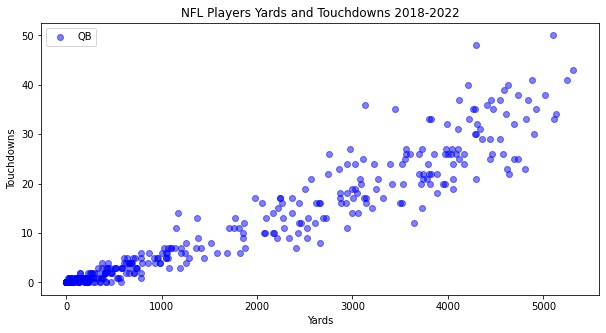

In [ ]:
#plot with qb players for the year 2018-2022

df = nfl

qb = df[df["fantasy_pos"] == "QB"]
rb = df[df["fantasy_pos"] == "RB"]
wr = df[df["fantasy_pos"] == "WR"]
te = df[df["fantasy_pos"] == "TE"]


df['pass_yds'] = pd.to_numeric(df['pass_yds'], errors='coerce')
df['pass_td'] = pd.to_numeric(df['pass_td'], errors='coerce')
df['rush_yds'] = pd.to_numeric(df['rush_yds'], errors='coerce')
df["rush_td"] = df["rush_td"].fillna(0)
df['rush_td'] = pd.to_numeric(df['rush_td'], errors='coerce')
df['rec_yds'] = pd.to_numeric(df['rec_yds'], errors='coerce')
df['rec_td'] = pd.to_numeric(df['rec_td'], errors='coerce')


plt.figure(figsize=(10,5))
plt.scatter(qb["pass_yds"], qb["pass_td"], color="blue", alpha=0.5, label="QB")

plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("NFL Players Yards and Touchdowns 2018-2022")
plt.legend()
plt.show()

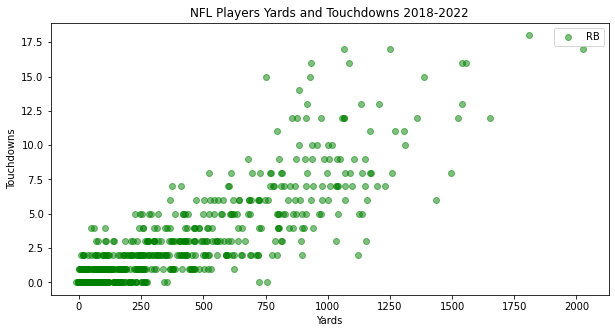

In [ ]:
#plot with rb players for the year 2018-2022
plt.figure(figsize=(10,5))
plt.scatter(rb["rush_yds"], rb["rush_td"], color="green", alpha=0.5, label="RB")



plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("NFL Players Yards and Touchdowns 2018-2022")
plt.legend()
plt.show()

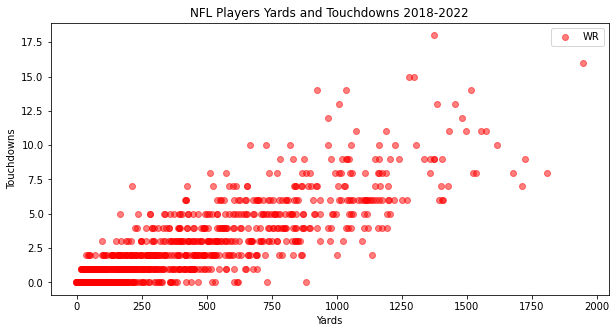

In [ ]:
#plot with wr players for the year 2018-2022

plt.figure(figsize=(10,5))
plt.scatter(wr["rec_yds"], wr["rec_td"], color="red", alpha=0.5, label="WR")


plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("NFL Players Yards and Touchdowns 2018-2022")
plt.legend()
plt.show()

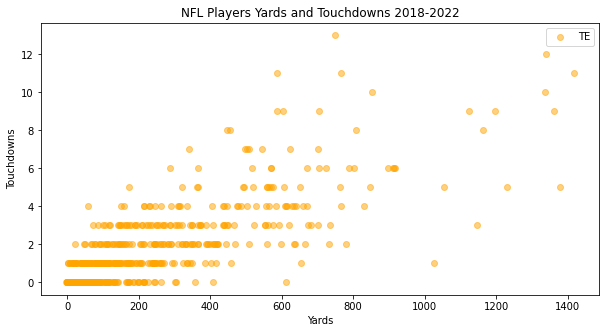

In [ ]:
#plot with te players for the year 2018-2022

plt.figure(figsize=(10,5))
plt.scatter(te["rec_yds"], te["rec_td"], color="orange", alpha=0.5, label="TE")


plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("NFL Players Yards and Touchdowns 2018-2022")
plt.legend()
plt.show()

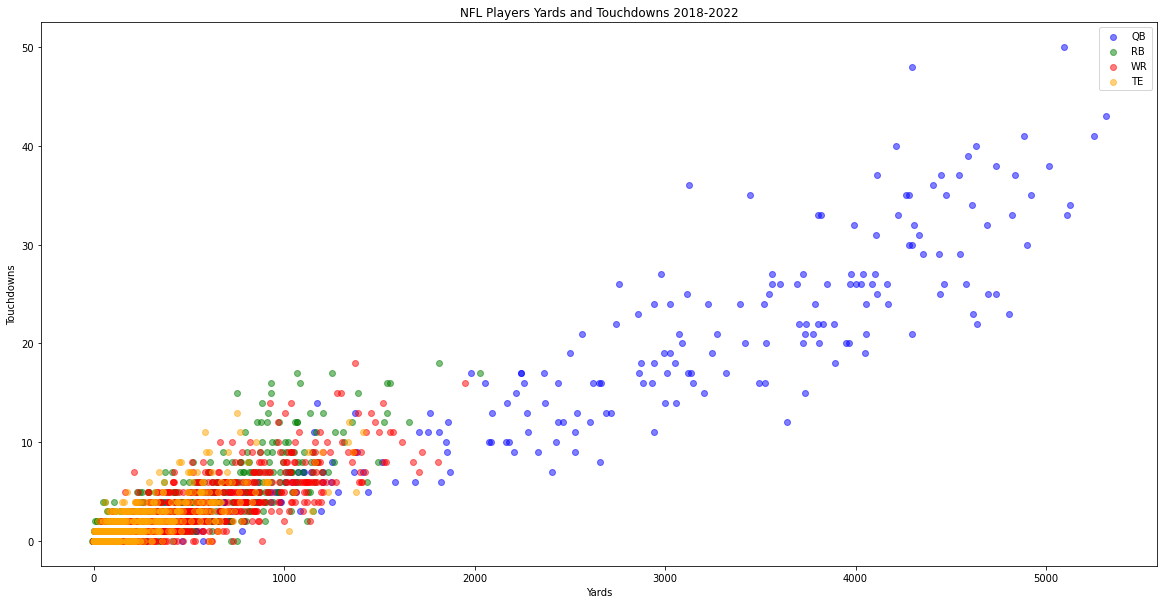

In [ ]:
#plot with all players for the year 2018-2022

plt.figure(figsize=(20,10))
plt.scatter(qb["pass_yds"], qb["pass_td"], color="blue", alpha=0.5, label="QB")
plt.scatter(rb["rush_yds"], rb["rush_td"], color="green", alpha=0.5, label="RB")
plt.scatter(wr["rec_yds"], wr["rec_td"], color="red", alpha=0.5, label="WR")
plt.scatter(te["rec_yds"], te["rec_td"], color="orange", alpha=0.5, label="TE")


plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("NFL Players Yards and Touchdowns 2018-2022")
plt.legend()
plt.show()

<ipython-input-25-d8f112459be2>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_qbs_values = qb.groupby(qb['Year'])['team', 'player','pass_yds', 'pass_td', 'Year'].apply(lambda x: x.nlargest(10, ["pass_yds"]))
<ipython-input-25-d8f112459be2>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_rbs_values = rb.groupby(rb['Year'])['team', 'player','rush_yds', 'rush_td', 'Year'].apply(lambda x: x.nlargest(10, ["rush_yds"]))
<ipython-input-25-d8f112459be2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_wrs_values = wr.groupby(wr['Year'])['team', 'player','rec_yds', 'rec_td', 'Year'].apply(lambda x: x.nlargest(10, ["rec_yds"]))
<ipython-input-25-d8f112459be2>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of

 PASS 
                           team              player  pass_yds  pass_td  Year
Year                                                                        
2018 26     Pittsburgh Steelers  Ben Roethlisberger    5129.0     34.0  2018
     4       Kansas City Chiefs     Patrick Mahomes    5097.0     50.0  2018
     20         Atlanta Falcons           Matt Ryan    4924.0     35.0  2018
     44        Los Angeles Rams          Jared Goff    4688.0     32.0  2018
     37      Indianapolis Colts         Andrew Luck    4593.0     39.0  2018
     42       Green Bay Packers       Aaron Rodgers    4442.0     25.0  2018
     79    New England Patriots           Tom Brady    4355.0     29.0  2018
     69    Los Angeles Chargers       Philip Rivers    4308.0     32.0  2018
     81         New York Giants         Eli Manning    4299.0     21.0  2018
     78       Minnesota Vikings        Kirk Cousins    4298.0     30.0  2018
2019 646   Tampa Bay Buccaneers      Jameis Winston    5109.0     33.

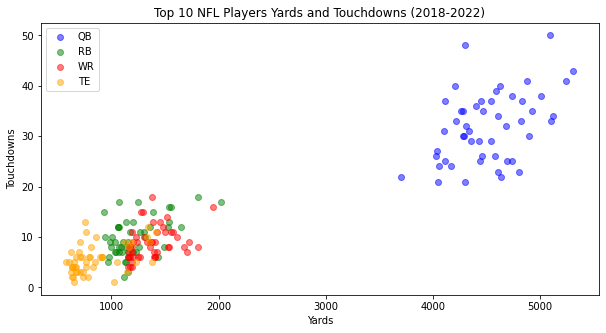

In [ ]:
# Plot with top 10 player names according to each year and each position by yards and touchdowns

top_qbs_values = qb.groupby(qb['Year'])['team', 'player','pass_yds', 'pass_td', 'Year'].apply(lambda x: x.nlargest(10, ["pass_yds"]))
print(" PASS ")
print(top_qbs_values)

top_rbs_values = rb.groupby(rb['Year'])['team', 'player','rush_yds', 'rush_td', 'Year'].apply(lambda x: x.nlargest(10, ["rush_yds"]))
print(" RUSH ")
print(top_rbs_values)

top_wrs_values = wr.groupby(wr['Year'])['team', 'player','rec_yds', 'rec_td', 'Year'].apply(lambda x: x.nlargest(10, ["rec_yds"]))
print(" REC ")
print(top_wrs_values)

top_tes_values = te.groupby(te['Year'])['team', 'player','rec_yds', 'rec_td', 'Year'].apply(lambda x: x.nlargest(10, ["rec_yds"]))
print(" REC ")
print(top_tes_values)



plt.figure(figsize=(10,5))
plt.scatter(top_qbs_values["pass_yds"], top_qbs_values["pass_td"], color="blue", alpha=0.5, label="QB")
plt.scatter(top_rbs_values["rush_yds"], top_rbs_values["rush_td"], color="green", alpha=0.5, label="RB")
plt.scatter(top_wrs_values["rec_yds"], top_wrs_values["rec_td"], color="red", alpha=0.5, label="WR")
plt.scatter(top_tes_values["rec_yds"], top_tes_values["rec_td"], color="orange", alpha=0.5, label="TE")
plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("Top 10 NFL Players Yards and Touchdowns (2018-2022)")
plt.legend()
plt.show()

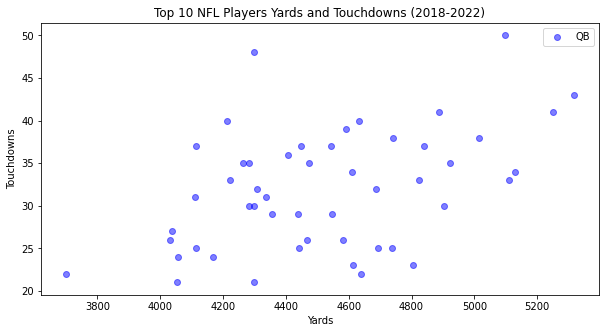

In [ ]:
# Plot with top 10 player names for the year 2018-2022 for the position qb by yards and touchdowns
plt.figure(figsize=(10,5))
plt.scatter(top_qbs_values["pass_yds"], top_qbs_values["pass_td"], color="blue", alpha=0.5, label="QB")
plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("Top 10 NFL Players Yards and Touchdowns (2018-2022)")
plt.legend()
plt.show()

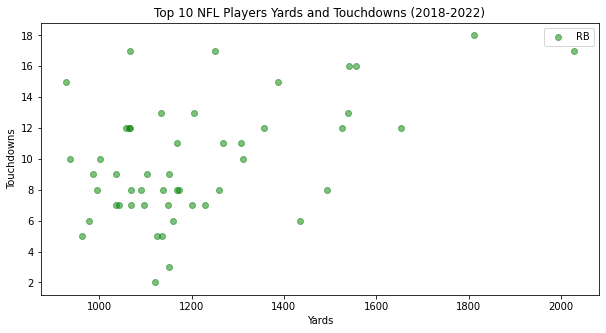

In [ ]:
# Plot with top 10 player names for the year 2018-2022 for the position rb by yards and touchdowns
plt.figure(figsize=(10,5))
plt.scatter(top_rbs_values["rush_yds"], top_rbs_values["rush_td"], color="green", alpha=0.5, label="RB")
plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("Top 10 NFL Players Yards and Touchdowns (2018-2022)")
plt.legend()
plt.show()

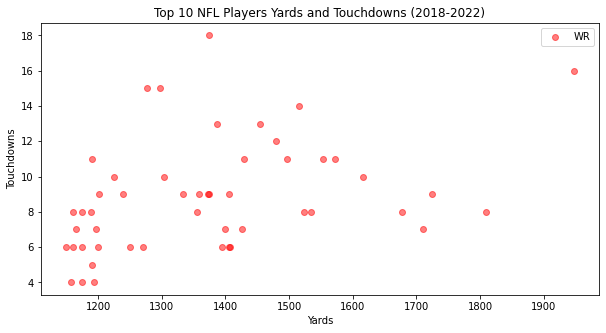

In [ ]:
# Plot with top 10 player names for the year 2018-2022 for the position wr by yards and touchdowns
plt.figure(figsize=(10,5))
plt.scatter(top_wrs_values["rec_yds"], top_wrs_values["rec_td"], color="red", alpha=0.5, label="WR")
plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("Top 10 NFL Players Yards and Touchdowns (2018-2022)")
plt.legend()
plt.show()

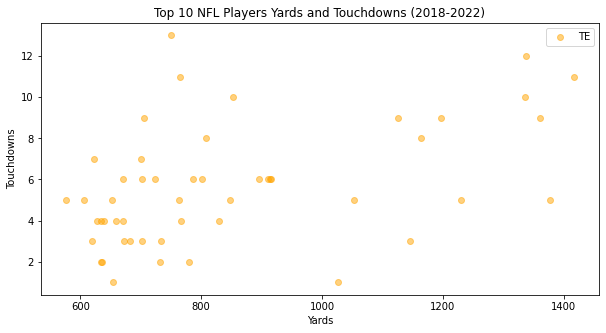

In [ ]:
# Plot with top 10 player names for the year 2018-2022 for the position te by yards and touchdowns
plt.figure(figsize=(10,5))
plt.scatter(top_tes_values["rec_yds"], top_tes_values["rec_td"], color="orange", alpha=0.5, label="TE")
plt.xlabel("Yards")
plt.ylabel("Touchdowns")
plt.title("Top 10 NFL Players Yards and Touchdowns (2018-2022)")
plt.legend()
plt.show()

In [ ]:
print(top_qbs_values)

                           team              player  pass_yds  pass_td  Year
Year                                                                        
2018 26     Pittsburgh Steelers  Ben Roethlisberger    5129.0     34.0  2018
     4       Kansas City Chiefs     Patrick Mahomes    5097.0     50.0  2018
     20         Atlanta Falcons           Matt Ryan    4924.0     35.0  2018
     44        Los Angeles Rams          Jared Goff    4688.0     32.0  2018
     37      Indianapolis Colts         Andrew Luck    4593.0     39.0  2018
     42       Green Bay Packers       Aaron Rodgers    4442.0     25.0  2018
     79    New England Patriots           Tom Brady    4355.0     29.0  2018
     69    Los Angeles Chargers       Philip Rivers    4308.0     32.0  2018
     81         New York Giants         Eli Manning    4299.0     21.0  2018
     78       Minnesota Vikings        Kirk Cousins    4298.0     30.0  2018
2019 646   Tampa Bay Buccaneers      Jameis Winston    5109.0     33.0  2019

In [ ]:
df = pd.DataFrame(top_qbs_values)
df.head()

team              player  pass_yds  pass_td  Year
Year                                                                     
2018 26  Pittsburgh Steelers  Ben Roethlisberger    5129.0     34.0  2018
     4    Kansas City Chiefs     Patrick Mahomes    5097.0     50.0  2018
     20      Atlanta Falcons           Matt Ryan    4924.0     35.0  2018
     44     Los Angeles Rams          Jared Goff    4688.0     32.0  2018
     37   Indianapolis Colts         Andrew Luck    4593.0     39.0  2018

# Scraping Standings Pages

In [ ]:
team_list = []
wins_list = []
losses_list = []
ties_list = []
wins_loss_perc_list = []
points_list = []
points_opp_list = []
points_diff_list = []
pass_td_list = []
mov_list = []
rush_att_list = []
sos_total_list = []
srs_total_list = []
srs_offense_list = []
srs_defense_list = []
url_list = []

In [ ]:
for year in range(2018, 2023):
    url = f"https://www.pro-football-reference.com/years/{year}/index.htm"
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    team = [team.text.strip('*+') for team in soup.find_all('th', attrs={'data-stat': 'team', 'scope': 'row'})]
    wins = [wins.text for wins in soup.find_all('td', attrs={'data-stat': 'wins'})]
    losses = [losses.text for losses in soup.find_all('td', attrs={'data-stat': 'losses'})]
    ties = [ties.text for ties in soup.find_all('td', attrs={'data-stat': 'ties'})]
    wins_loss_perc = [win_loss_perc.text for win_loss_perc in soup.find_all('td', attrs={'data-stat': 'win_loss_perc'})]
    points = [points.text for points in soup.find_all('td', attrs={'data-stat': 'points'})]
    points_opp = [points_opp.text for points_opp in soup.find_all('td', attrs={'data-stat': 'points_opp'})]
    points_diff = [points_diff.text for points_diff in soup.find_all('td', attrs={'data-stat': 'points_diff'})]
    mov = [mov.text for mov in soup.find_all('td', attrs={'data-stat': 'mov'})]
    sos_total = [sos_total.text for sos_total in soup.find_all('td', attrs={'data-stat': 'sos_total'})]
    srs_total = [srs_total.text for srs_total in soup.find_all('td', attrs={'data-stat': 'srs_total'})]
    srs_offense = [srs_offense.text for srs_offense in soup.find_all('td', attrs={'data-stat': 'srs_offense'})]
    srs_defense = [srs_defense.text for srs_defense in soup.find_all('td', attrs={'data-stat': 'srs_defense'})]
    urls = [url] * len(wins)

    team_list += team
    wins_list += wins
    losses_list += losses
    ties_list += ties
    wins_loss_perc_list += wins_loss_perc
    points_list += points
    points_opp_list += points_opp
    points_diff_list += points_diff
    mov_list += mov
    sos_total_list += sos_total
    srs_total_list += srs_total
    srs_offense_list += srs_offense
    srs_defense_list += srs_defense
    url_list += urls


In [ ]:
standings = pd.DataFrame({'Team': team_list,
        'Wins': wins_list,
        'Losses': losses_list,
        'Ties': ties_list,
        'Win-Loss Percentage': wins_loss_perc_list,
        'Points For': points_list,
        'Points Against': points_opp_list,
        'Points Differential': points_diff_list,
        'Margin of Victory': mov_list,
        'Strength of Schedule': sos_total_list,
        'Simple Rating System': srs_total_list,
        'Offensive Simple Rating System': srs_offense_list,
        'Defensive Simple Rating System': srs_defense_list,
        'URL': url_list
       })

In [ ]:
standings.shape

(160, 14)

In [ ]:
standings['Year'] = standings['URL'].str.extract(r'(\d{4})')
standings.columns

Index(['Team', 'Wins', 'Losses', 'Ties', 'Win-Loss Percentage', 'Points For',
       'Points Against', 'Points Differential', 'Margin of Victory',
       'Strength of Schedule', 'Simple Rating System',
       'Offensive Simple Rating System', 'Defensive Simple Rating System',
       'URL', 'Year'],
      dtype='object')

In [ ]:
standings = standings.drop(columns=['URL'])

In [ ]:
afc_east = ['New England Patriots',
            'Miami Dolphins',
            'Buffalo Bills',
            'New York Jets']
afc_north = ['Baltimore Ravens',
            'Pittsburgh Steelers',
            'Cleveland Browns',
            'Cincinnati Bengals']
afc_south = ['Jacksonville Jaguars',
            'Tennessee Titans',
            'Indianapolis Colts',
            'Houston Texans']
afc_west = ['Kansas City Chiefs',
            'Los Angeles Chargers',
            'Las Vegas Raiders',
            'Denver Broncos',
            'Oakland Raiders']


nfc_east = ['Philadelphia Eagles',
            'Dallas Cowboys',
            'New York Giants',
            'Washington Commanders',
            'Washington Redskins',
            'Washington Football Team']
nfc_north = ['Minnesota Vikings',
              'Detroit Lions',
              'Green Bay Packers',
              'Chicago Bears']
nfc_south = ['Tampa Bay Buccaneers',
              'Carolina Panthers',
              'New Orleans Saints',
              'Atlanta Falcons']
nfc_west = ['San Francisco 49ers',
            'Seattle Seahawks',
            'Los Angeles Rams',
            'Arizona Cardinals']

In [ ]:
division_dict = {}
for team in afc_east:
    division_dict[team] = 'AFC East'
for team in afc_north:
    division_dict[team] = 'AFC North'
for team in afc_south:
    division_dict[team] = 'AFC South'
for team in afc_west:
    division_dict[team] = 'AFC West'
for team in nfc_east:
    division_dict[team] = 'NFC East'
for team in nfc_north:
    division_dict[team] = 'NFC North'
for team in nfc_south:
    division_dict[team] = 'NFC South'
for team in nfc_west:
    division_dict[team] = 'NFC West'

standings['division_region'] = standings['Team'].map(division_dict)


In [ ]:
standings

,Team,Wins,Losses,Ties,Win-Loss Percentage,Points For,Points Against,Points Differential,Margin of Victory,Strength of Schedule,Simple Rating System,Offensive Simple Rating System,Defensive Simple Rating System,Year,division_region
0,New England Patriots,11,5,0,.688,436,325,111,6.9,-1.8,5.2,3.1,2.1,2018,AFC East
1,Miami Dolphins,7,9,0,.438,319,433,-114,-7.1,-1.7,-8.8,-3.6,-5.2,2018,AFC East
2,Buffalo Bills,6,10,0,.375,269,374,-105,-6.6,-0.3,-6.9,-6.3,-0.6,2018,AFC East
3,New York Jets,4,12,0,.250,333,441,-108,-6.8,-1.1,-7.8,-2.0,-5.9,2018,AFC East
4,Baltimore Ravens,10,6,0,.625,389,287,102,6.4,0.6,7.0,0.6,6.4,2018,AFC North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Atlanta Falcons,7,10,0,.412,365,386,-21,-1.2,-0.9,-2.1,-0.1,-2.0,2022,NFC South
156,San Francisco 49ers,13,4,0,.765,450,277,173,10.2,-2.3,7.9,3.3,4.6,2022,NFC West
157,Seattle Seahawks,9,8,0,.529,407,401,6,0.4,-0.8,-0.5,1.9,-2.4,2022,NFC West
158,Los Angeles Rams,5,12,0,.294,307,384,-77,-4.5,0.5,-4.0,-4.1,0.0,2022,NFC West


# Data Exploration

In [ ]:
# Renaming teams to show the latest changes
standings.loc[standings['Team'] == 'Washington Redskins', 'Team'] = 'Washington Commanders'
standings.loc[standings['Team'] == 'Washington Football Team', 'Team'] = 'Washington Commanders'
standings.loc[standings['Team'] == 'Oakland Raiders', 'Team'] = 'Las Vegas Raiders'

In [ ]:
standings['Ranking'] = standings.groupby(['Year', 'division_region'])['Win-Loss Percentage'].rank(method='first', ascending=False)
standings

,Team,Wins,Losses,Ties,Win-Loss Percentage,Points For,Points Against,Points Differential,Margin of Victory,Strength of Schedule,Simple Rating System,Offensive Simple Rating System,Defensive Simple Rating System,Year,division_region,Ranking
0,New England Patriots,11,5,0,.688,436,325,111,6.9,-1.8,5.2,3.1,2.1,2018,AFC East,1.0
1,Miami Dolphins,7,9,0,.438,319,433,-114,-7.1,-1.7,-8.8,-3.6,-5.2,2018,AFC East,2.0
2,Buffalo Bills,6,10,0,.375,269,374,-105,-6.6,-0.3,-6.9,-6.3,-0.6,2018,AFC East,3.0
3,New York Jets,4,12,0,.250,333,441,-108,-6.8,-1.1,-7.8,-2.0,-5.9,2018,AFC East,4.0
4,Baltimore Ravens,10,6,0,.625,389,287,102,6.4,0.6,7.0,0.6,6.4,2018,AFC North,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Atlanta Falcons,7,10,0,.412,365,386,-21,-1.2,-0.9,-2.1,-0.1,-2.0,2022,NFC South,4.0
156,San Francisco 49ers,13,4,0,.765,450,277,173,10.2,-2.3,7.9,3.3,4.6,2022,NFC West,1.0
157,Seattle Seahawks,9,8,0,.529,407,401,6,0.4,-0.8,-0.5,1.9,-2.4,2022,NFC West,2.0
158,Los Angeles Rams,5,12,0,.294,307,384,-77,-4.5,0.5,-4.0,-4.1,0.0,2022,NFC West,3.0


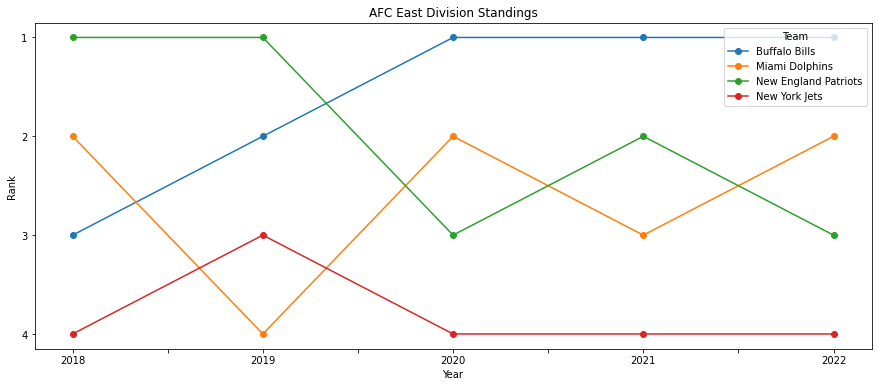

In [ ]:
# Filter the data to only include the AFC East division
afc_east = standings[standings['division_region'] == 'AFC East']

# Create a pivot table with the year as the index and the team as the columns
afc_east_pivot = pd.pivot_table(afc_east, values='Ranking', index='Year', columns='Team')

# Plot the pivot table as a line graph
fig, ax = plt.subplots(figsize=(15, 6))
afc_east_pivot.plot(kind='line', marker='o',ax=ax)


# Add labels and titles to the graph
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('AFC East Division Standings')

# Reverse the order of the y-axis
ax.invert_yaxis()

# Show the graph
plt.show()

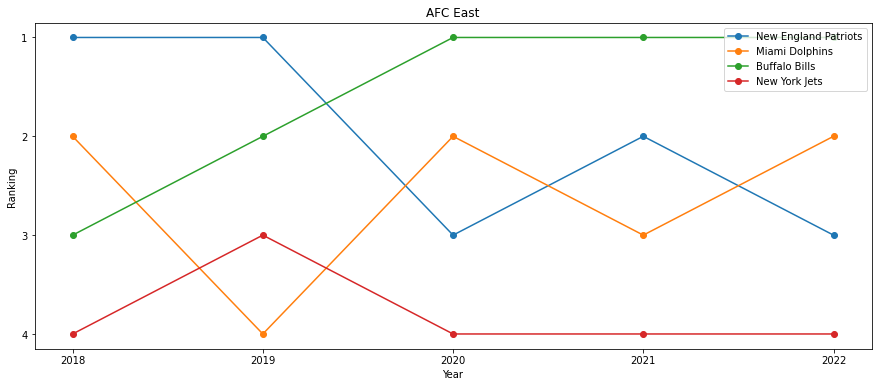

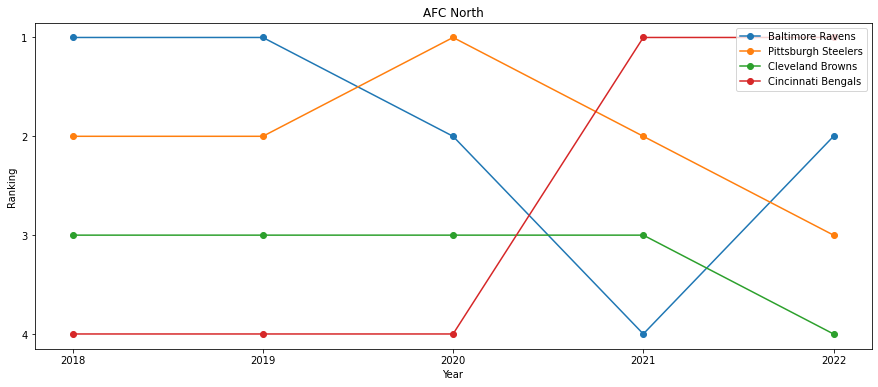

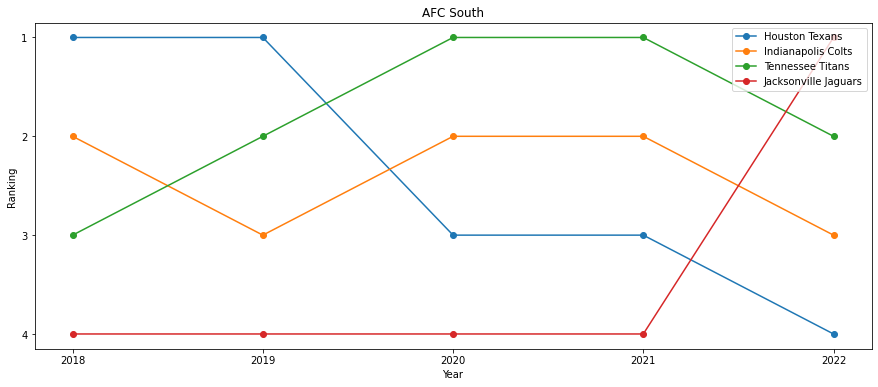

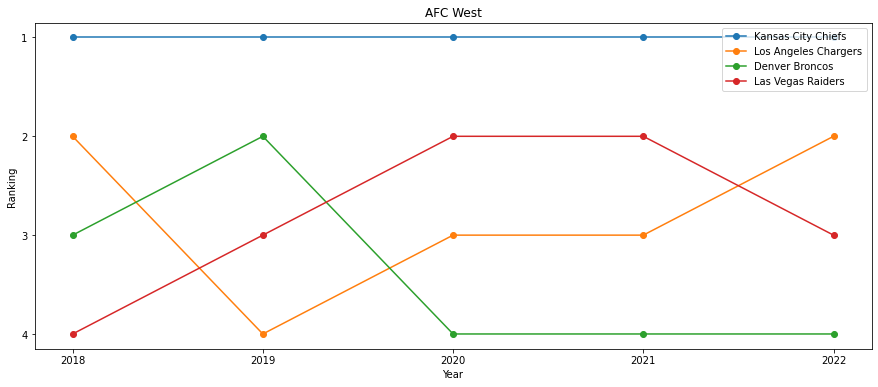

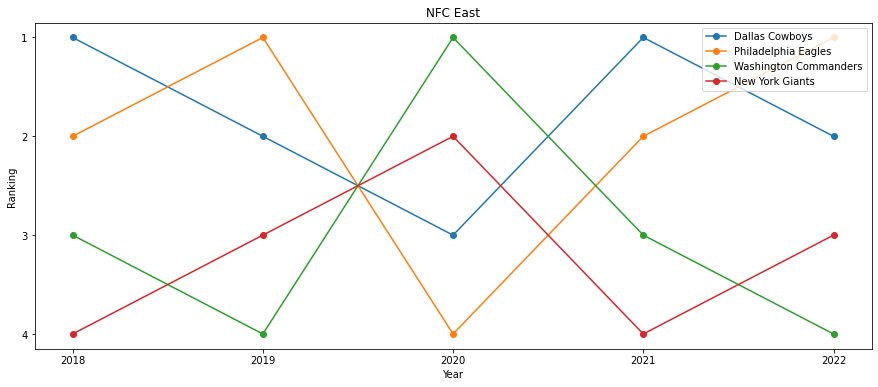

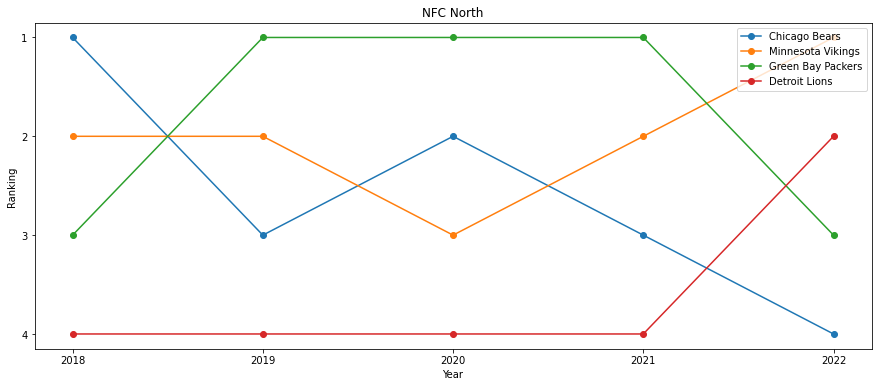

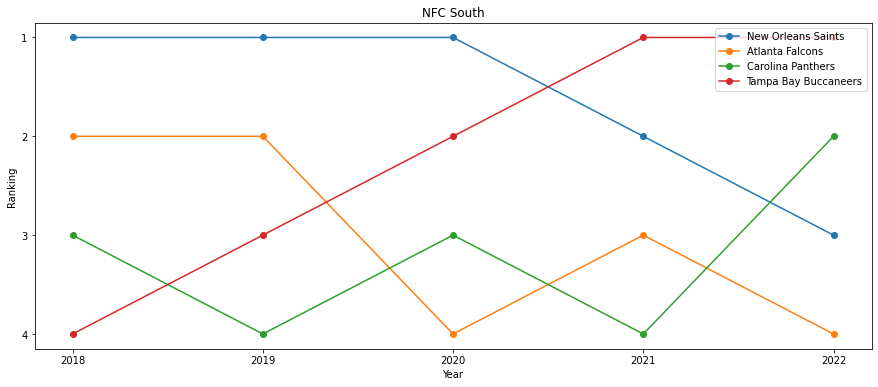

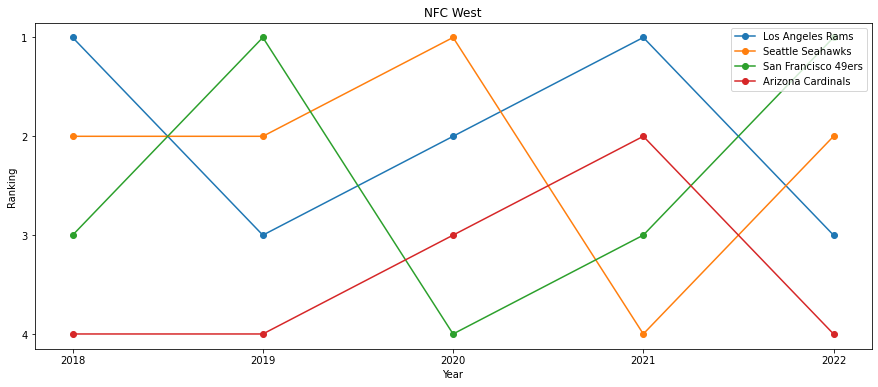

In [ ]:
divisions = standings['division_region'].unique()

# iterate through each division
for division in divisions:
    division_df = standings[standings['division_region'] == division]

    # create a figure and axis
    fig, ax = plt.subplots()

    ## setting plot size for all plots
    fig.set_size_inches(15, 6)

    # plot each team's rank over time
    for team in division_df['Team'].unique():
        team_df = division_df[division_df['Team'] == team]
        ax.plot(team_df['Year'], team_df['Ranking'], label=team, marker='o')

    # invert the y-axis
    ax.invert_yaxis()

    # add a title and legend
    ax.set_title(division)
    ax.legend(loc='upper right') # setting legend location to top right

    ## setting y ticks to integers only; imported MaxNlocator to achieve this
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.ylabel('Ranking')
    plt.xlabel('Year')

    # show the plot
    plt.show()

# Saving dataframes as CSV files

In [ ]:
from google.colab import files

In [ ]:
nfl.to_csv('NFL_Fantasy_2018_2022.csv', index=False)
files.download('NFL_Fantasy_2018_2022.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
standings.to_csv('NFL_Standings_2018_2022.csv', index=False)
files.download('NFL_Standings_2018_2022.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>